## KNN

<img src='https://cdn-images-1.medium.com/max/800/0*Sk18h9op6uK9EpT8.'/>

- Euclidean dist :  the Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points 

- Hamming dist : the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different
    
"karolin" and "kathrin" is 3.

"karolin" and "kerstin" is 3.

1011101 and 1001001 is 2.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
df =pd.DataFrame(iris.data,columns = ['sepal_length','sepal_width','petal_length','petal_width'])
df['class']=iris.target

#### species
- setosa
- versicolor
- virginica

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df['sepal_length']!=5.1]

,sepal_length,sepal_width,petal_length,petal_width,class
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
10,5.4,3.7,1.5,0.2,0


In [7]:
x = iris.data
y = iris.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [10]:
x_train.shape , x_test.shape

((105, 4), (45, 4))

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier(n_neighbors=5)

In [13]:
preds = []
for i in range(10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    preds.append(model.predict(x_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10,random_state = 7)

results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')

results.sum()/10

0.93333333333333335

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.83      0.94      0.88        16
          2       0.93      0.82      0.87        17

avg / total       0.92      0.91      0.91        45



In [17]:
data = pd.DataFrame({'actual':y_test,'pred':pred})

In [21]:
pred.shape

(45,)

In [18]:
data.head()

,actual,pred
0,2,2
1,1,1
2,0,0
3,1,1
4,2,1


In [19]:
import seaborn as sns
%matplotlib inline

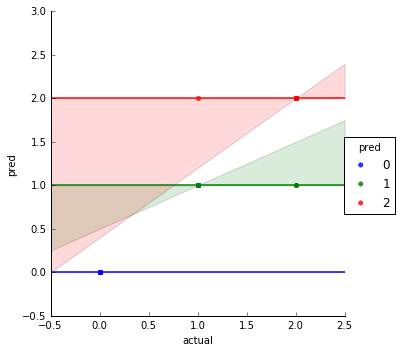

In [24]:
sns.lmplot('actual','pred',data,hue='pred')